In [115]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
income = pd.read_csv('adult.data')

In [4]:
income.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
income.rename(columns={' 2174': 'capital-gain',
                       ' 0': 'capital-loss',
                       ' 40': 'hours-per-week',
                       ' United-Stated': 'native-country',
                       '39': 'age',
                       ' State-gov': 'workclass',
                       ' Bachelors': 'education',
                       ' Never-married': 'marital-status',
                       ' Adm-clerical': 'occupation',
                       ' Not-in-family' :'relationship',
                       ' White': 'race',
                       ' Male': 'sex'
                      },
              inplace=True)

In [6]:
income.head()

,age,workclass,77516,education,13,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
uneccessary_col = [' 77516',' 13']

In [8]:
income.drop(uneccessary_col,axis=1,inplace=True)

In [9]:
income.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,United-States,<=50K
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [10]:
income.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', ' United-States', ' <=50K'],
      dtype='object')

In [11]:
income.rename(columns={' United-States': 'native-country'},inplace=True)

In [12]:
income.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50K
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
# columns to one-hot encode
ohe_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country',' <=50K']

In [14]:
for cat_col in ohe_cols:
    dummies = pd.get_dummies(income[cat_col],drop_first=True)
    income = pd.concat([income.drop(cat_col,axis=1),dummies],axis=1)


In [15]:
income.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', ' Federal-gov',
       ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' 11th', ' 12th',
       ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc',
       ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool',
       ' Prof-school', ' Some-college', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Male',
       ' Cambodia

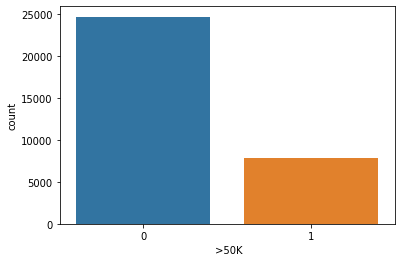

In [117]:
sns.countplot(data=income,x=' >50K')

In [16]:
X = income.drop(' >50K',axis=1).values
y = income[' >50K'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [139]:
model = Sequential()
model.add(Dense(98,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [140]:
from tensorflow.keras.callbacks import EarlyStopping

In [141]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [142]:
model.fit(X_train,y_train,batch_size=16,epochs=1000,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 22792 samples, validate on 9768 samples
Epoch 1/1000
22792/22792 [==============================] - 2s 106us/sample - loss: 0.4541 - accuracy: 0.7652 - val_loss: 0.3851 - val_accuracy: 0.8165
Epoch 2/1000
22792/22792 [==============================] - 2s 84us/sample - loss: 0.4003 - accuracy: 0.8088 - val_loss: 0.3709 - val_accuracy: 0.8340
Epoch 3/1000
22792/22792 [==============================] - 2s 82us/sample - loss: 0.3792 - accuracy: 0.8256 - val_loss: 0.3538 - val_accuracy: 0.8350
Epoch 4/1000
22792/22792 [==============================] - 2s 87us/sample - loss: 0.3687 - accuracy: 0.8265 - val_loss: 0.3462 - val_accuracy: 0.8375
Epoch 5/1000
22792/22792 [==============================] - 2s 83us/sample - loss: 0.3644 - accuracy: 0.8291 - val_loss: 0.3428 - val_accuracy: 0.8405
Epoch 6/1000
22792/22792 [==============================] - 2s 82us/sample - loss: 0.3578 - accuracy: 0.8338 - val_loss: 0.3376 - val_accuracy: 0.8402
Epoch 7/1000
22792/22792 [==================

In [143]:
metrics = pd.DataFrame(model.history.history)

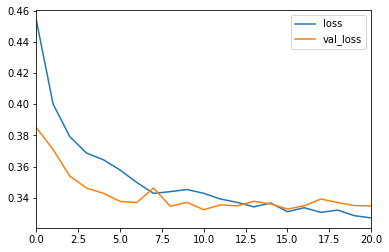

In [144]:
metrics[['loss','val_loss']].plot()

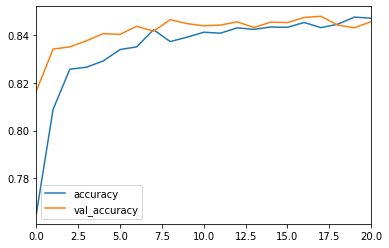

In [145]:
metrics[['accuracy','val_accuracy']].plot()

In [146]:
import matplotlib.pyplot as plt

In [147]:
predictions = model.predict_classes(X_test)

In [148]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [149]:
model.evaluate(X_test,y_test,verbose=0)

[0.3347307980841637, 0.84551597]

In [150]:
from sklearn.metrics import classification_report,confusion_matrix

In [151]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7408
           1       0.72      0.58      0.65      2360

    accuracy                           0.85      9768
   macro avg       0.80      0.76      0.77      9768
weighted avg       0.84      0.85      0.84      9768



In [152]:
print(confusion_matrix(y_test,predictions))

[[6880  528]
 [ 981 1379]]
